In [52]:
# AIM OF THE PROJECT

## 1. The main aim of the project is to predict whether the person has diabetes or not.
## This is done by using a simple artificial neural networks.

In [53]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# load the dataset
data = pd.read_csv('/content/diabetes.csv')

In [55]:
# print the data
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [56]:
# display top five rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [57]:
# display last five rows of the dataset
print(data.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [58]:
# shape of the dataset
print(data.shape)

(768, 9)


In [59]:
# To check if there are any NULL Values in the dataset
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [60]:
# So from the above observation, it is clear that there are no NULL Values in the dataset

In [61]:
# Use the count plot to display the summary statistics of the persons who are diabetic or non-diabetic

<Axes: >

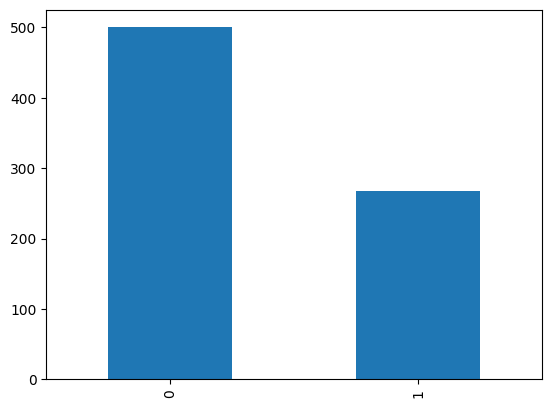

In [62]:
data['Outcome'].value_counts().plot(kind = 'bar')

In [63]:
predictors = data.iloc[:,0:8].values
print(predictors)


response = data.iloc[:,8].values
print(response)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [64]:
# Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size = 0.2, random_state = 0)

In [65]:
# BUILD AND TRAIN THE ARTIFICIAL NEURAL NETWORKS

# import all the libraries for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialize the model for ANN
annmodel = Sequential()

# Construct the first ANN Model

# Add the first hidden layer
annmodel.add(Dense(12,activation = 'relu',input_dim = 8))

# Add the second hidden layer
annmodel.add(Dense(8, activation = 'relu'))

# Add the output layer
annmodel.add(Dense(1, activation = 'sigmoid'))

In [66]:
# COMPILE THE ARTIFICIAL NEURAL NETWORKS

annmodel.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [67]:
# TRAIN THE ANN Model
annmodel.fit(X_train, Y_train, batch_size = 10, epochs = 150)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 3.9573 - accuracy: 0.5326
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 1.9316 - accuracy: 0.5326
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 1.6094 - accuracy: 0.5570
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 1.3485 - accuracy: 0.5603
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 1.1302 - accuracy: 0.5863
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.5945
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8814 - accuracy: 0.6140
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.6303
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.6319
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.6205
Epoch 11/

In [68]:
# BEST TRAINING ACCURACY
_, result = annmodel.evaluate(X_train, Y_train)
print("Accuracy is:", (result*100.0))

20/20 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7476
Accuracy is: 74.7556984424591


In [69]:
# To get the predicted output
Y_pred_test = annmodel.predict(X_test)
print(Y_pred_test)

5/5 [==============================] - 0s 2ms/step
[[8.50971818e-01]
 [1.62230238e-01]
 [1.82895198e-01]
 [6.19308114e-01]
 [2.32567191e-01]
 [4.57450263e-02]
 [5.46298206e-01]
 [7.30713964e-01]
 [4.39475596e-01]
 [3.64171177e-01]
 [8.76038134e-01]
 [7.82298148e-01]
 [2.86047846e-01]
 [3.03287476e-01]
 [1.75455108e-01]
 [2.44577348e-01]
 [8.91312480e-01]
 [1.33002371e-01]
 [3.21908385e-01]
 [4.39309150e-01]
 [5.04848957e-01]
 [3.45320165e-01]
 [4.93806362e-01]
 [8.93361941e-02]
 [3.39068413e-01]
 [4.19479519e-01]
 [1.47942185e-01]
 [7.15919793e-01]
 [2.58841366e-01]
 [2.74041027e-01]
 [6.02607906e-01]
 [2.79416949e-01]
 [1.33832082e-01]
 [6.03196144e-01]
 [2.10972711e-01]
 [6.39295220e-01]
 [4.36793596e-01]
 [4.61187735e-02]
 [4.20514256e-01]
 [5.94670951e-01]
 [3.56358230e-01]
 [2.22913623e-01]
 [1.75216690e-01]
 [7.59710252e-01]
 [6.21242940e-01]
 [1.04583085e-01]
 [1.29920155e-01]
 [4.20511007e-01]
 [4.49277073e-01]
 [3.40984941e-01]
 [4.94388491e-01]
 [3.20647985e-01]
 [9.69784975e

In [70]:
Y_pred_test = (Y_pred_test > 0.9)


print(Y_pred_test)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 

In [71]:
# ACCURACY SCORE BETWEEN ACTUAL OUTPUT AND PREDICTED OUTPUT
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test, Y_pred_test, normalize = False)
print("Accuracy score is:", (ac * 100.0))

Accuracy score is: 10600.0


In [72]:
# CONFUSION MATRIX BETWEEN ACTUAL OUTPUT AND PREDICTED OUTPUT

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)

print(cm)

[[105   2]
 [ 46   1]]


<Axes: >

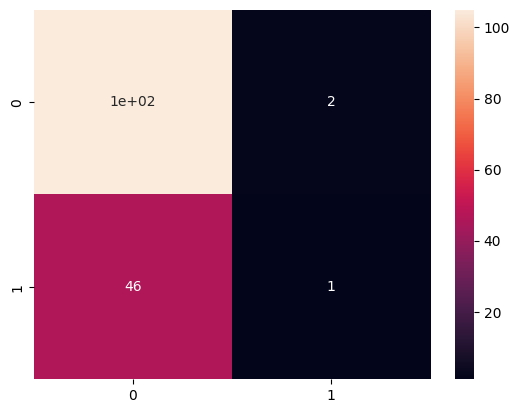

In [73]:
# To graphically see the confusion matrix using heat map
import seaborn as sns
sns.heatmap(cm, annot = True)